### Keras 模型建立

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, normalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

###  1. 模型构建

In [2]:
def CNN_():
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)))
    model.add(normalization.BatchNormalization())
#     model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
#     model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
                         
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
#     model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
#     model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
#     model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
#     model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
                         
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))        
    
    model.summary()
    return model

In [3]:
model = CNN_()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

###  2. 定义损失函数和训练模型

In [4]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

### 3. 定义可变的学习速率

In [5]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

### 4. 加载数据

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### 5. 标准化数据 Z-Score

In [7]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

### 6. 对输出进行One-hot编码

In [8]:
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### 7. 增广数据集

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

### 8. 训练模型并保存

In [10]:
checkpoint = ModelCheckpoint('E:\\school\\2-2\\ac_eng\\cifar\\model\\augmented_model_2.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

model_details = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=x_train.shape[0]/32, epochs=125,
                    verbose=1,validation_data=(x_test,y_test),callbacks=[checkpoint, LearningRateScheduler(lr_schedule)])

scores = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('\n Test result: %.2f%% loss: %.3f' % (scores[1]*100, scores[0]))

Epoch 1/125
1563/1562 [==============================] - 605s 387ms/step - loss: 1.8832 - acc: 0.3941 - val_loss: 1.4250 - val_acc: 0.5219
Epoch 2/125
1563/1562 [==============================] - 615s 394ms/step - loss: 1.4368 - acc: 0.5096 - val_loss: 1.1915 - val_acc: 0.6029
Epoch 3/125
1563/1562 [==============================] - 603s 386ms/step - loss: 1.3271 - acc: 0.5527 - val_loss: 1.1798 - val_acc: 0.6057
Epoch 4/125
1563/1562 [==============================] - 604s 386ms/step - loss: 1.2651 - acc: 0.5745 - val_loss: 1.0934 - val_acc: 0.6478
Epoch 5/125
1563/1562 [==============================] - 609s 390ms/step - loss: 1.2383 - acc: 0.5879 - val_loss: 1.1552 - val_acc: 0.6354
Epoch 6/125
1563/1562 [==============================] - 605s 387ms/step - loss: 1.2170 - acc: 0.5952 - val_loss: 1.1198 - val_acc: 0.6424
Epoch 7/125
1563/1562 [==============================] - 607s 388ms/step - loss: 1.1909 - acc: 0.6094 - val_loss: 1.0942 - val_acc: 0.6509
Epoch 8/125
1563/1562 [====

1563/1562 [==============================] - 593s 379ms/step - loss: 1.0479 - acc: 0.6712 - val_loss: 1.0372 - val_acc: 0.6914
Epoch 59/125
1563/1562 [==============================] - 594s 380ms/step - loss: 1.0421 - acc: 0.6707 - val_loss: 0.9112 - val_acc: 0.7255
Epoch 60/125
1563/1562 [==============================] - 593s 380ms/step - loss: 1.0446 - acc: 0.6684 - val_loss: 0.9196 - val_acc: 0.7247
Epoch 61/125
1563/1562 [==============================] - 593s 379ms/step - loss: 1.0448 - acc: 0.6693 - val_loss: 0.9769 - val_acc: 0.7102
Epoch 62/125
1563/1562 [==============================] - 593s 379ms/step - loss: 1.0403 - acc: 0.6723 - val_loss: 0.9371 - val_acc: 0.7167
Epoch 63/125
1563/1562 [==============================] - 592s 379ms/step - loss: 1.0424 - acc: 0.6703 - val_loss: 0.9530 - val_acc: 0.7148
Epoch 64/125
1563/1562 [==============================] - 590s 377ms/step - loss: 1.0423 - acc: 0.6724 - val_loss: 1.0595 - val_acc: 0.6853
Epoch 65/125
1563/1562 [=========

1563/1562 [==============================] - 595s 381ms/step - loss: 0.9469 - acc: 0.6985 - val_loss: 0.8361 - val_acc: 0.7474
Epoch 117/125
1563/1562 [==============================] - 598s 383ms/step - loss: 0.9494 - acc: 0.6933 - val_loss: 0.9177 - val_acc: 0.7254
Epoch 118/125
1563/1562 [==============================] - 593s 379ms/step - loss: 0.9496 - acc: 0.6950 - val_loss: 0.9110 - val_acc: 0.7293
Epoch 119/125
1563/1562 [==============================] - 593s 379ms/step - loss: 0.9475 - acc: 0.6960 - val_loss: 0.9058 - val_acc: 0.7272
Epoch 120/125
1563/1562 [==============================] - 592s 379ms/step - loss: 0.9509 - acc: 0.6947 - val_loss: 0.8916 - val_acc: 0.7277
Epoch 121/125
1563/1562 [==============================] - 589s 377ms/step - loss: 0.9422 - acc: 0.6986 - val_loss: 0.8880 - val_acc: 0.7283
Epoch 122/125
1563/1562 [==============================] - 592s 378ms/step - loss: 0.9446 - acc: 0.6978 - val_loss: 0.9125 - val_acc: 0.7244
Epoch 123/125
1563/1562 [==

### 9. 准确率/误差曲线

In [11]:
import matplotlib.pyplot as plt

def plot_model_details(model_details):
    plt.figure(figsize=(15, 5))
     # plot model accuracy
    plt.subplot(1, 2, 1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['acc'])+1), model_details.history['acc'])
    plt.plot(range(1, len(model_details.history['val_acc'])+1), model_details.history['val_acc'])
    plt.xticks(np.arange(1, len(model_details.history['acc'])+len(model_details.history['acc'])/10, len(model_details.history['acc'])/10))
    plt.legend(['train', 'validation'], loc='best')
    
    # plot model loss
    plt.subplot(1, 2, 2)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['loss'])+1), model_details.history['loss'])
    plt.plot(range(1, len(model_details.history['val_loss'])+1), model_details.history['val_loss'])
    plt.xticks(np.arange(1, len(model_details.history['loss'])+len(model_details.history['loss'])/10, len(model_details.history['loss'])/10))
    plt.legend(['train', 'validation'], loc='best')

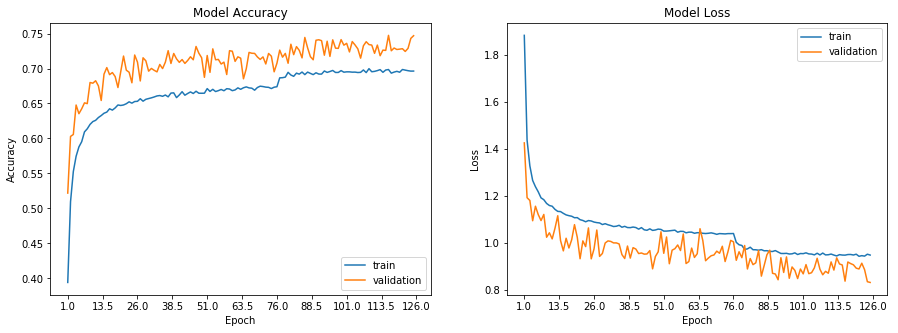

In [12]:
plot_model_details(model_details)